<a href="https://colab.research.google.com/github/J4sonN/Arsenal-s-Worst-EPL-Starts/blob/main/Arsenal's_worst_PL_starts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Data Analizing for Arsenal's worst ever Premier League start**

Author: Quan Nguyen  
Date: 4-18-2023

- The Dataset selected: ["This is Arsenal's worst ever start to a Premier League season"](https://www.reddit.com/r/soccer/comments/k5vya1/this_is_arsenals_worst_ever_start_to_a_premier/)
- Original Image:
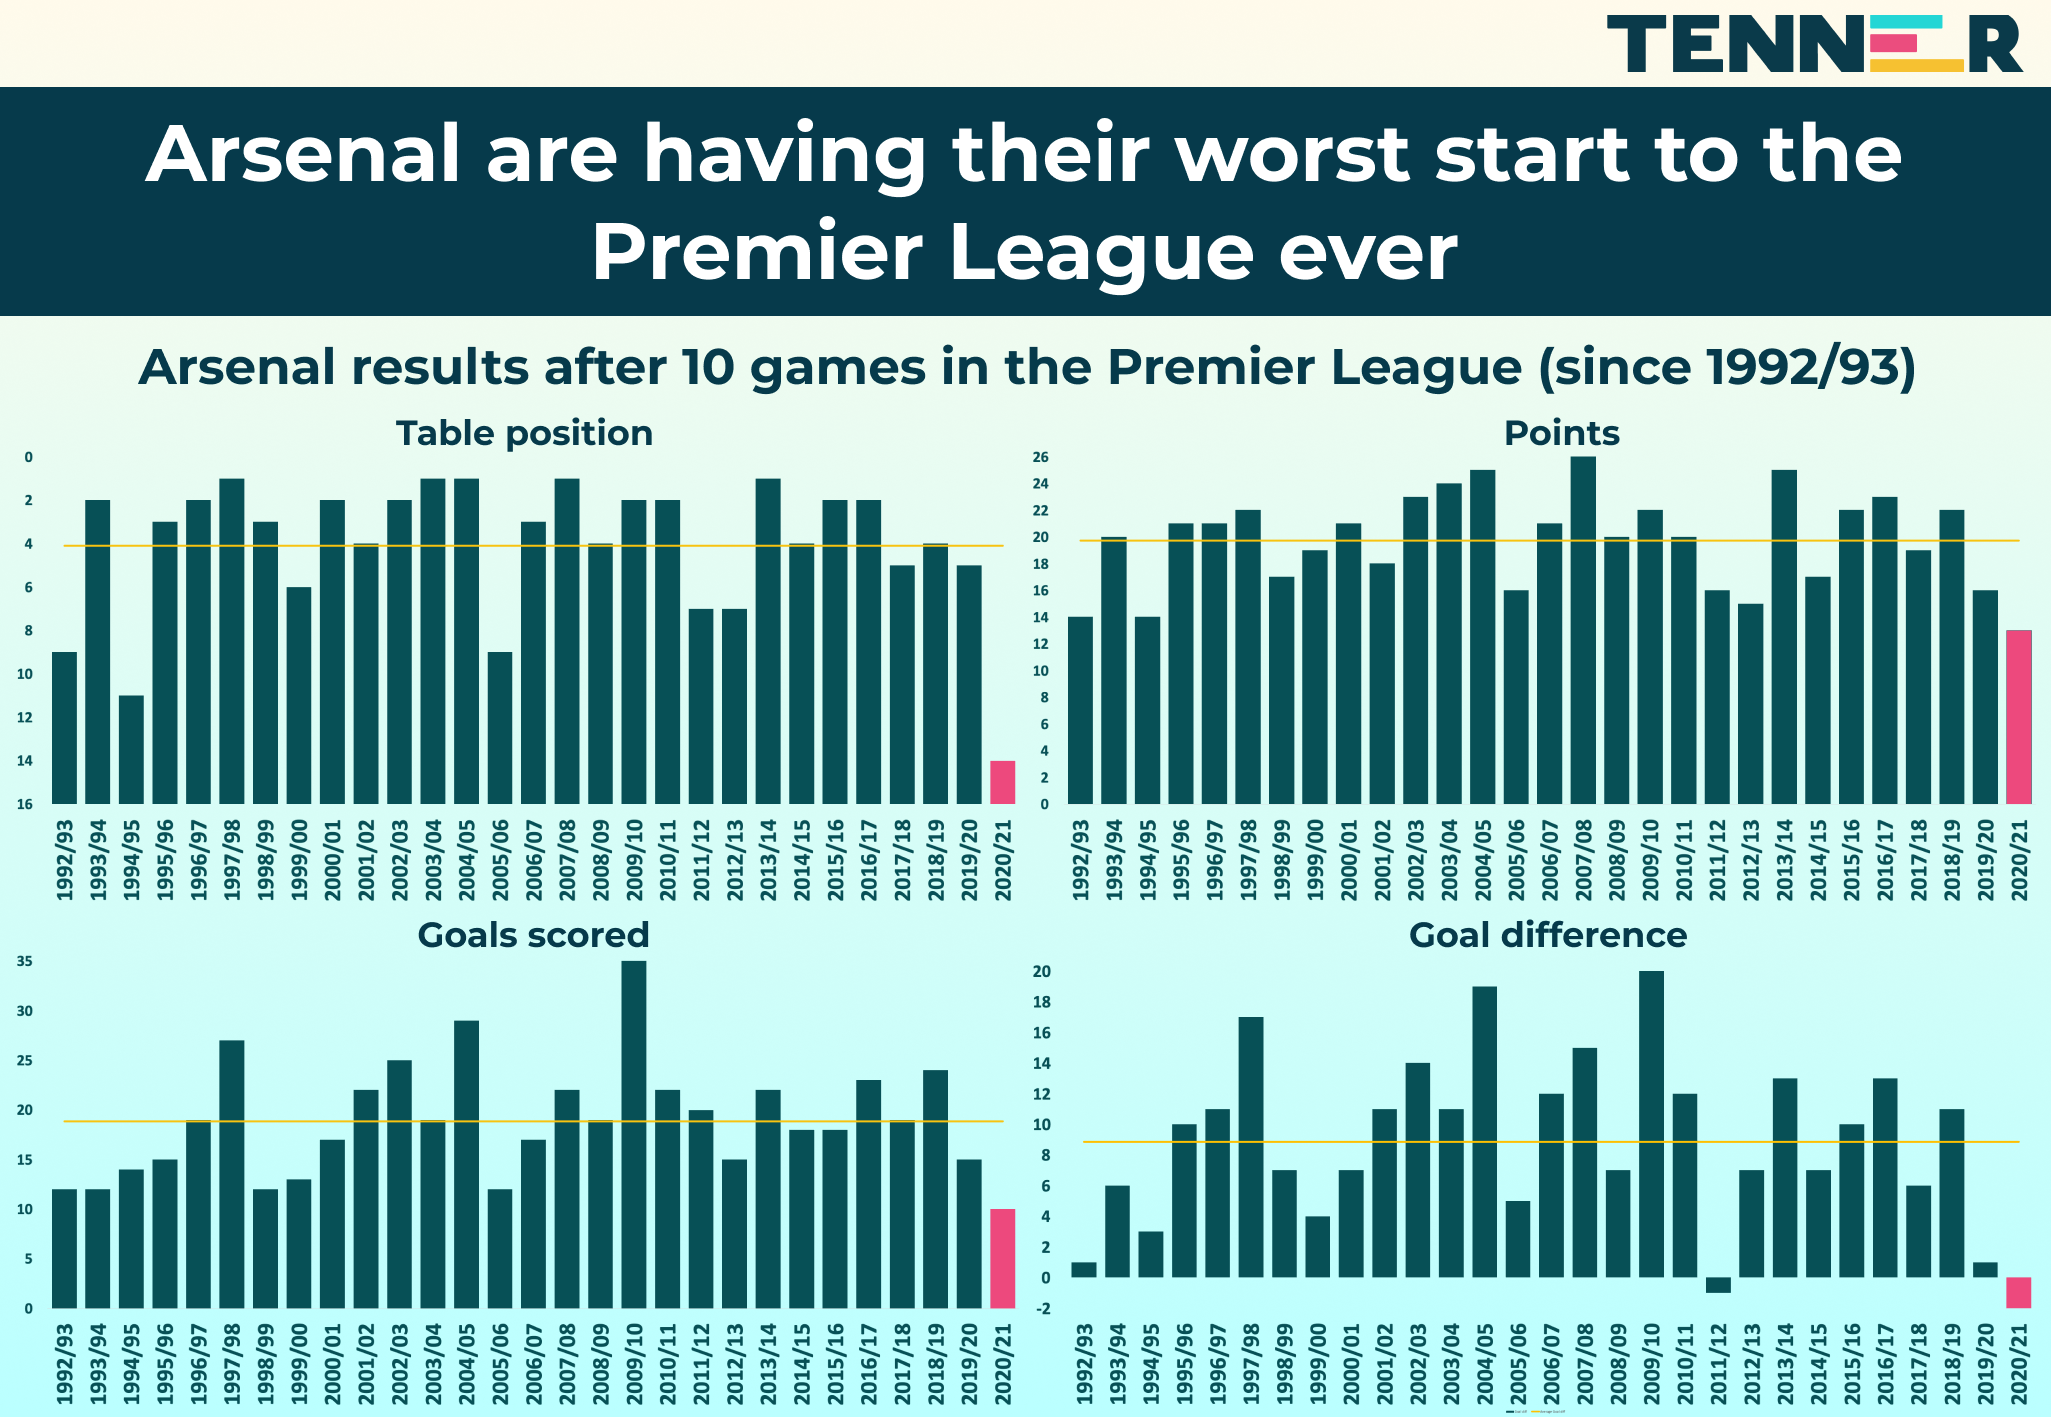

#**Import Libraries**

In [1]:
##Pandas
import pandas as pd
##Numpy
import numpy as np
##Seaborn 
import seaborn as sns
##Matplotlib
import matplotlib.pyplot as plt
##Filter all warnings 
import warnings
warnings.filterwarnings('ignore')

#Load and Inspect Data

In [2]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_excel('/content/drive/MyDrive/04 Week 4: Explanatory Viz/Week51.xlsx')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Season           29 non-null     object 
 1   Played           29 non-null     int64  
 2   Won              29 non-null     int64  
 3   Drawn            29 non-null     int64  
 4   Lost             29 non-null     int64  
 5   Goals For        29 non-null     int64  
 6   Goals Against    29 non-null     int64  
 7   Goal Difference  29 non-null     int64  
 8   Points           29 non-null     int64  
 9   Position         29 non-null     int64  
 10  Final Points     28 non-null     float64
 11  Final Position   28 non-null     float64
dtypes: float64(2), int64(9), object(1)
memory usage: 2.8+ KB


In [5]:
df.head()

,Season,Played,Won,Drawn,Lost,Goals For,Goals Against,Goal Difference,Points,Position,Final Points,Final Position
0,1992/93,19,9,2,8,22,20,2,29,8,56.0,10.0
1,1993/94,21,9,7,5,20,13,7,34,5,71.0,4.0
2,1994/95,19,6,6,7,23,22,1,24,11,51.0,12.0
3,1995/96,18,8,7,3,23,12,11,31,6,63.0,5.0
4,1996/97,17,10,5,2,34,16,18,35,2,68.0,3.0


Use df.info() and df.head() methods to preview the first rows of your data and a summary of your DataFrame's columns.

#Data Cleaning

- Checking how many rows and colums does the dataset has.

In [6]:
df.shape

(29, 12)

In [7]:
print(f"There is {df.shape[0]} rows, and {df.shape[1]} columns in the data")

There is 29 rows, and 12 columns in the data


**Check datatypes of each column**

In [8]:
df.dtypes

Season              object
Played               int64
Won                  int64
Drawn                int64
Lost                 int64
Goals For            int64
Goals Against        int64
Goal Difference      int64
Points               int64
Position             int64
Final Points       float64
Final Position     float64
dtype: object

##Check Duplicates

In [9]:
df.duplicated().sum()

0

There is no duplicates in this data set

##Identify missing values

In [10]:
df.isna().sum()

Season             0
Played             0
Won                0
Drawn              0
Lost               0
Goals For          0
Goals Against      0
Goal Difference    0
Points             0
Position           0
Final Points       1
Final Position     1
dtype: int64

In [11]:
#locate the row that has missing values
df.loc[df.isna().any(axis=1)]

,Season,Played,Won,Drawn,Lost,Goals For,Goals Against,Goal Difference,Points,Position,Final Points,Final Position
28,2020/21,13,4,2,7,11,16,-5,14,15,NaN,NaN


> research for standings of this seasons shows that Arsenal final position was 8 and final point was 61
https://www.espn.com/soccer/standings/_/league/eng.1/season/2020

In [12]:
df['Final Points'].fillna(61, inplace=True)
df['Final Position'].fillna(8, inplace=True )

In [13]:
print(f'There is {df.isna().sum().sum()} missing value in this data set')

There is 0 missing value in this data set


##Check for inconsitency categories of data

In [14]:
df.describe(include='number')

,Played,Won,Drawn,Lost,Goals For,Goals Against,Goal Difference,Points,Position,Final Points,Final Position
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,17.137931,8.862069,4.310345,3.965517,29.344828,17.655172,11.689655,30.862069,4.758621,71.448276,4.034483
std,1.381618,1.940621,1.872802,1.741977,7.266734,4.202685,6.887377,5.323292,3.247583,9.045860,2.638760
min,13.000000,4.000000,2.000000,0.000000,11.000000,10.000000,-5.000000,14.000000,1.000000,51.000000,1.000000
25%,16.000000,8.000000,3.000000,3.000000,24.000000,14.000000,7.000000,29.000000,2.000000,68.000000,2.000000
50%,17.000000,9.000000,4.000000,4.000000,30.000000,18.000000,13.000000,32.000000,5.000000,71.000000,4.000000
75%,18.000000,10.000000,6.000000,5.000000,34.000000,20.000000,16.000000,35.000000,6.000000,78.000000,5.000000
max,21.000000,12.000000,8.000000,8.000000,44.000000,27.000000,22.000000,40.000000,15.000000,90.000000,12.000000


- No issues noted

#Testing Mathplotlib default

In [85]:
def my_barplot(df, x='Season', y='Won'):
    fig, ax = plt.subplots()
    ax.bar(df[x], df[y], edgecolor='white')
    ax.set(title=f'{x} vs. {y}', ylabel=y, xlabel=x);
    ax.tick_params(axis = 'x', rotation = 90)
    return fig, ax

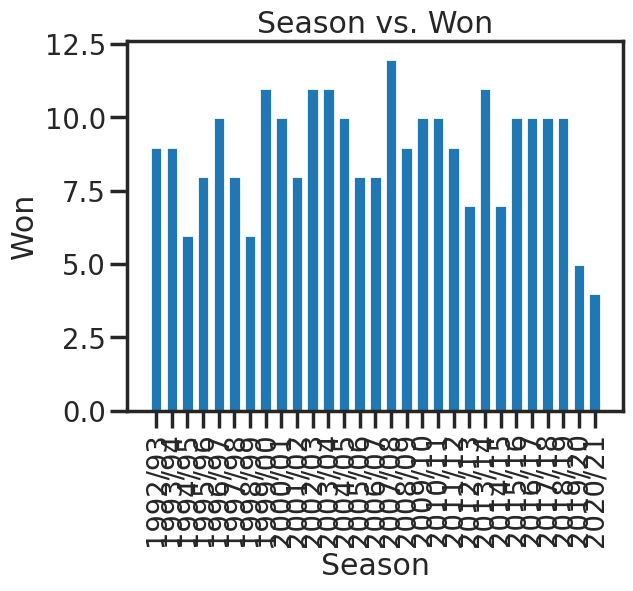

In [86]:
fig, ax = my_barplot(df)

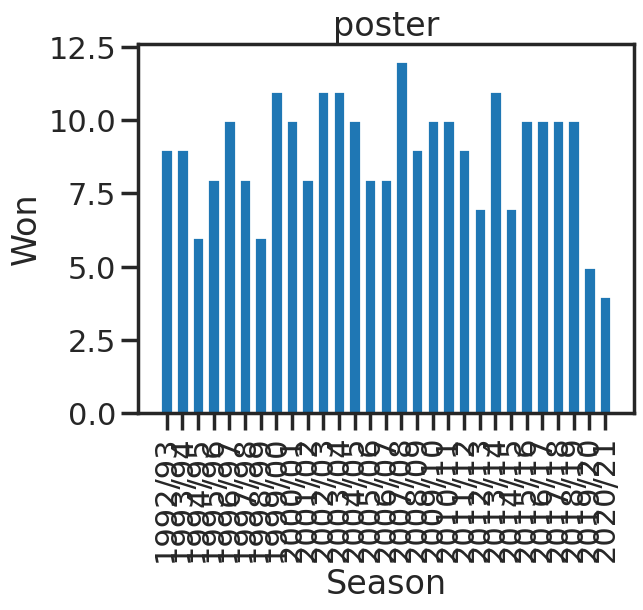

In [87]:
context_name = 'poster'
with sns.plotting_context(context_name):    
    fig,ax = my_barplot(df)
    ax.set_title(context_name)

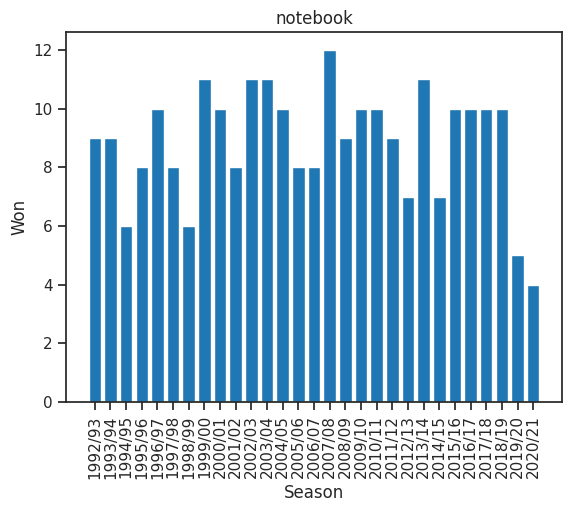

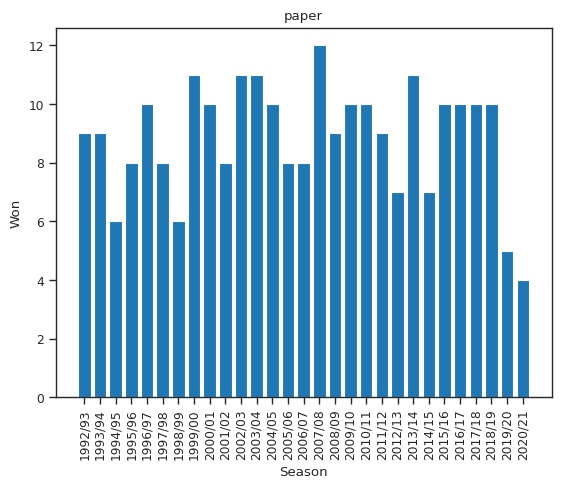

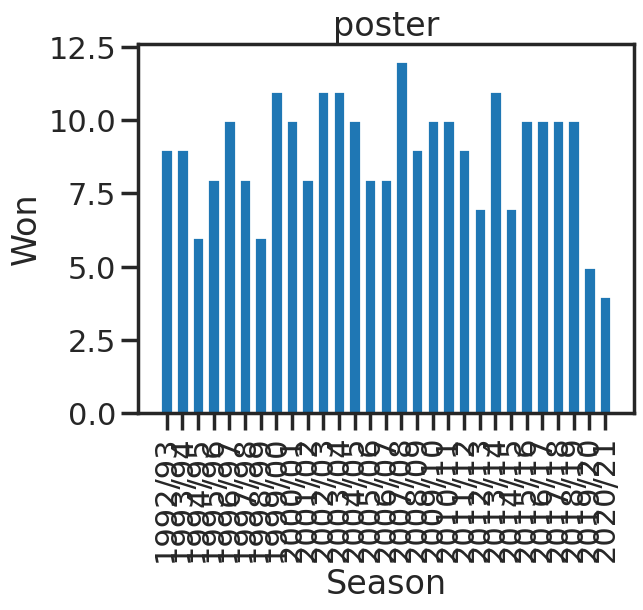

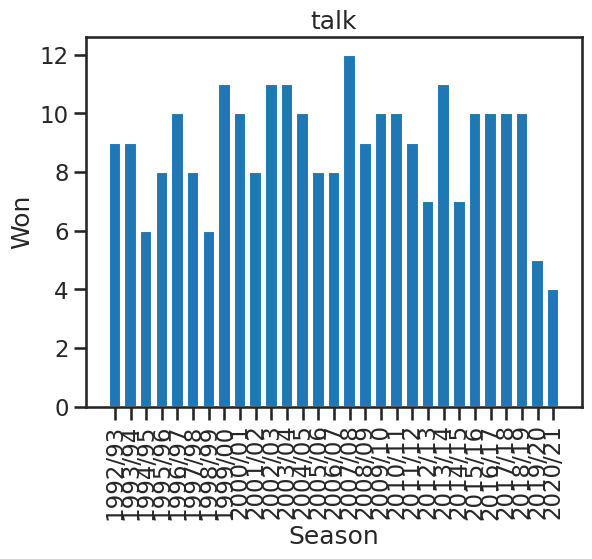

In [88]:
for context_name in ['notebook','paper','poster','talk']:
    with sns.plotting_context(context_name):
        fig,ax =  my_barplot(df)
        ax.set_title(context_name)
        plt.show()

- set my context to paper for easy visualizing

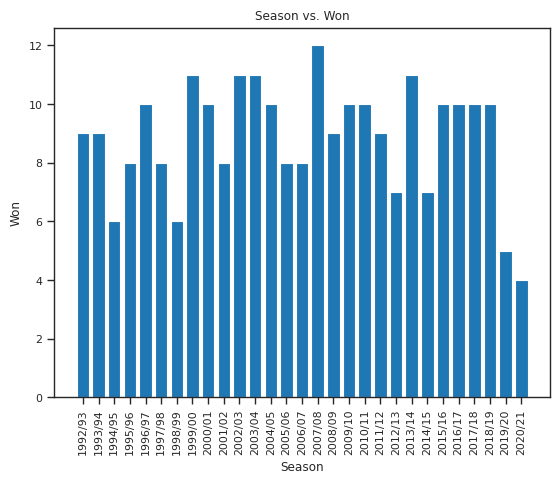

In [89]:
sns.set_context("paper", font_scale=0.9)
fig,ax =  my_barplot(df)


#Data Analysis

In [91]:
df.select_dtypes('number').columns

Index(['Played', 'Won', 'Drawn', 'Lost', 'Goals For', 'Goals Against',
       'Goal Difference', 'Points', 'Position', 'Final Points',
       'Final Position'],
      dtype='object')

In [111]:
def plot(df,col1,col2,col3,col4):
  ## make the figure and axes sharing the same x-axis
  fig, axes = plt.subplots(nrows = 2,ncols=2,figsize= (10,12), sharex = True)
  ## Use seaborn plot
  sns.barplot(data = df, x = df['Season'], y = col1, ax = axes[0,0])
  sns.barplot(data = df, x = df['Season'], y = col2, ax = axes[0,1])
  sns.barplot(data = df, x = df['Season'], y = col3, ax = axes[1,0])
  sns.barplot(data = df, x = df['Season'], y = col4, ax = axes[1,1])
  axes[1,0].tick_params(axis='x', rotation = 90)
  axes[1,1].tick_params(axis='x',rotation = 90)
  sns.set_theme(style="ticks", palette=None)
  ## fixing overlapping labels and showing
  plt.tight_layout()
  plt.show()

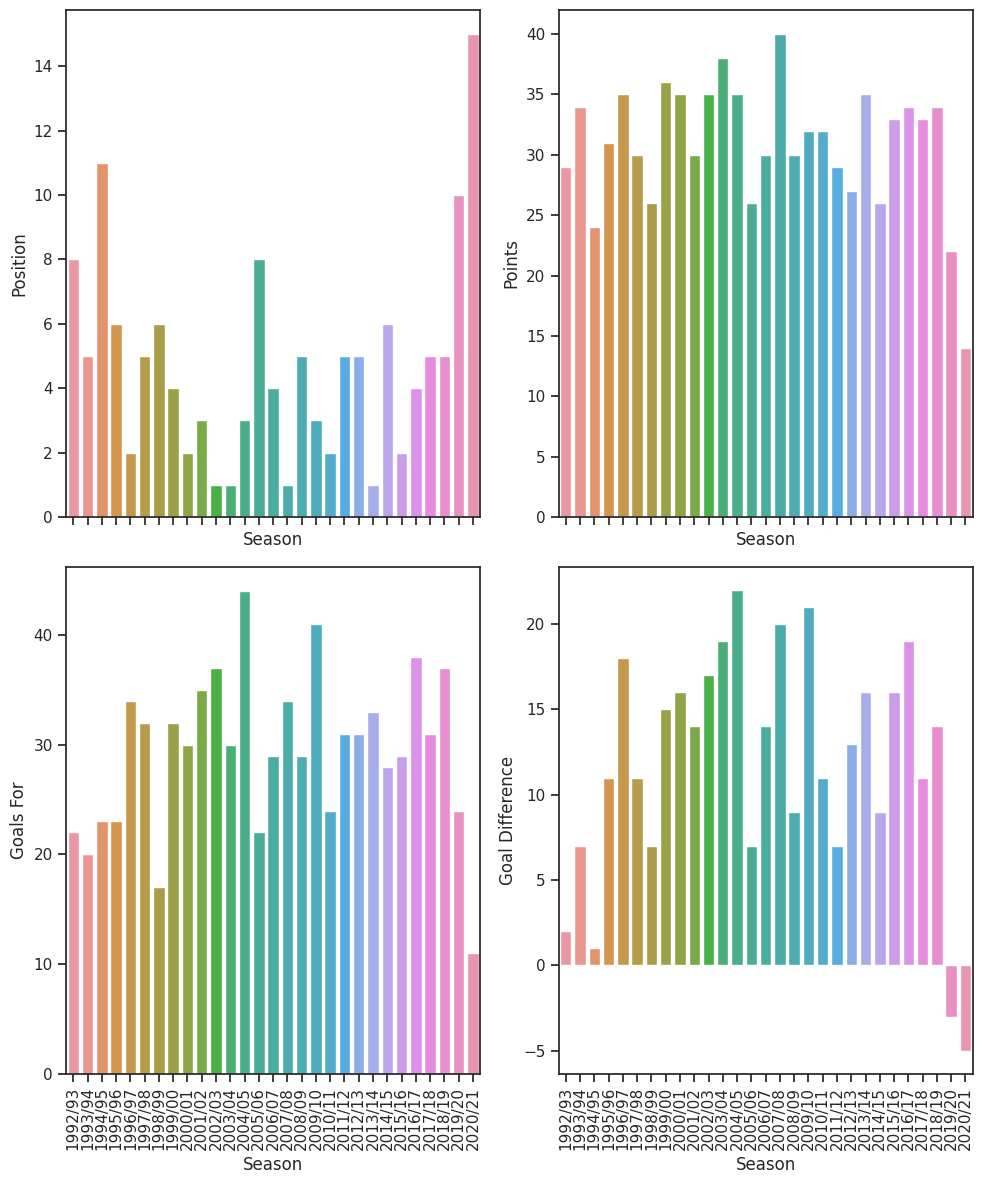

In [112]:
plot(df,'Position','Points','Goals For', 'Goal Difference')